In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pickle
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df =pd.read_csv(r"/content/ElectricCarData_Clean.csv")

In [4]:
df.head(5)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [5]:
print(df.isnull().sum())

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [7]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


In [8]:
print(df.isnull().sum())


Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64


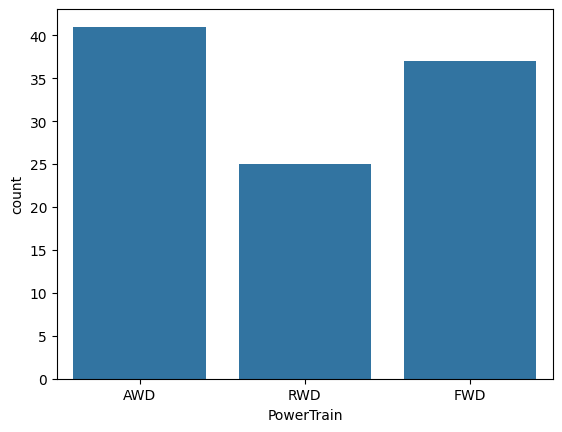

In [13]:
sns.countplot(x ='PowerTrain', data = df)
plt.show()

1. AWD (All-Wheel Drive) is the most common powertrain type, indicating a preference for better traction and performance.

2. FWD (Front-Wheel Drive) follows as the second most common, suggesting its popularity for compact and economical cars.

3. RWD (Rear-Wheel Drive) is the least common, possibly due to its limited traction in adverse conditions, making it less popular among modern electric cars.

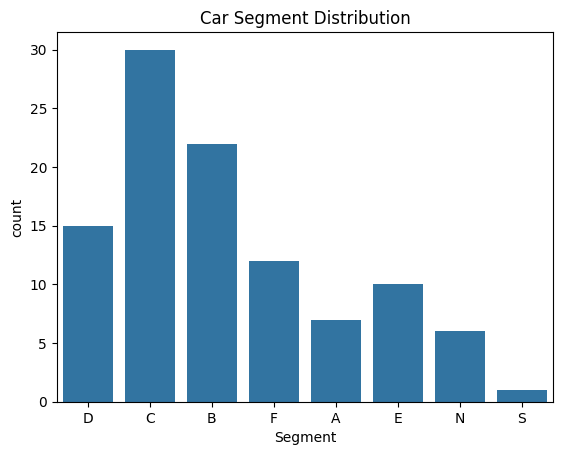

In [14]:
sns.countplot(data=df, x='Segment')
plt.title('Car Segment Distribution')
plt.show()

1. Segment C cars are the most common, followed by B and D, indicating that compact and mid-size cars dominate the market.

2. Segments S and N are the least common, suggesting low demand or limited availability of sports and niche cars.

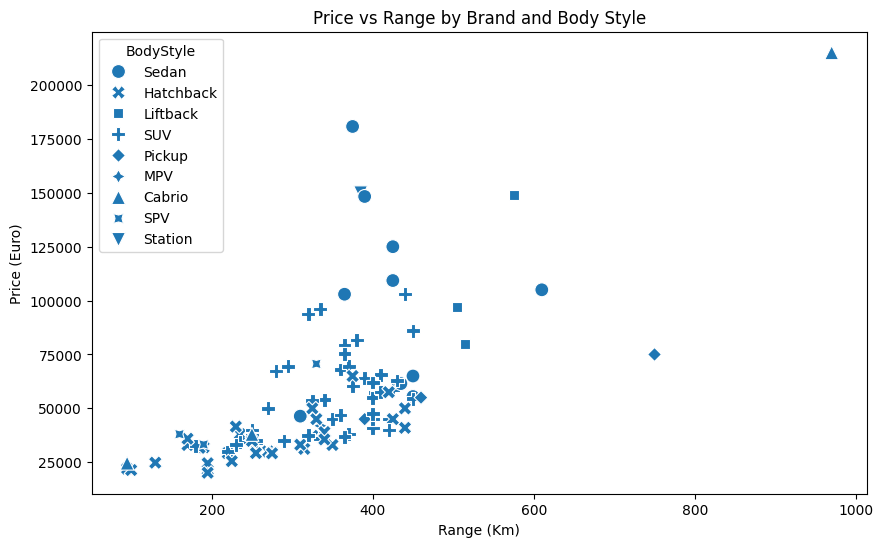

In [33]:
#+To see how car range impacts price and how different brands compare.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Range_Km', y='PriceEuro', style='BodyStyle', s=100)
plt.title('Price vs Range by Brand and Body Style')
plt.xlabel('Range (Km)')
plt.ylabel('Price (Euro)')
plt.show()


1. There is a general positive correlation between Range (Km) and Price (Euro), indicating that cars with higher ranges tend to be more expensive.

2. Sedans and SUVs dominate the mid-range price segment, while Cabrio and some SUVs fall into the higher price bracket.

3. There are a few outliers, like a Station Wagon with an exceptionally high range and price, suggesting a premium model with advanced technology.

4. Hatchbacks and Liftbacks mostly fall into the lower price and range categories, reflecting their economical and compact design.

<ipython-input-34-4de397d0dc71>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Brand', y='AccelSec', palette='Set2')


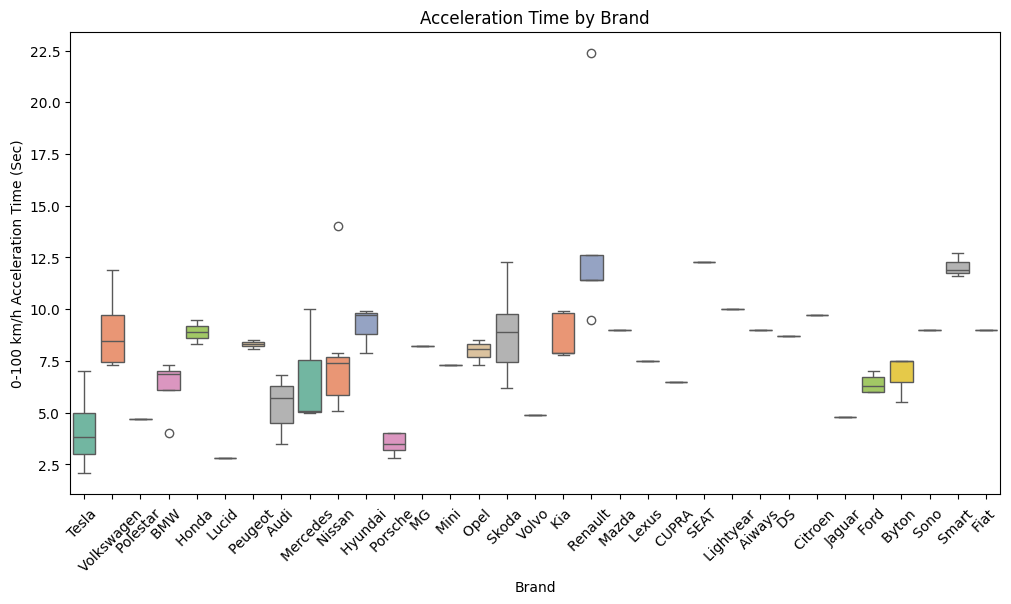

In [34]:
#Compare the acceleration times for each brand.
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Brand', y='AccelSec', palette='Set2')
plt.title('Acceleration Time by Brand')
plt.xlabel('Brand')
plt.ylabel('0-100 km/h Acceleration Time (Sec)')
plt.xticks(rotation=45)
plt.show()

1. Tesla and Lucid cars have the fastest acceleration times (around 2.5 to 4 seconds), indicating their focus on high performance.

2. Fiat, Smart, and some Volvo models have relatively slower acceleration times (around 10 to 20 seconds), suggesting these brands prioritize economy and utility over performance.

3. Brands like BMW, Audi, and Mercedes have a wider range of acceleration times, indicating diverse model lineups catering to both performance and comfort.

4. Outliers are noticeable in brands like Honda, Peugeot, and Volvo, indicating a few models that differ significantly from the brand’s general trend.

5. The most consistent acceleration performance is seen in Porsche, which has low variance, indicating a strong focus on high-performance vehicles.

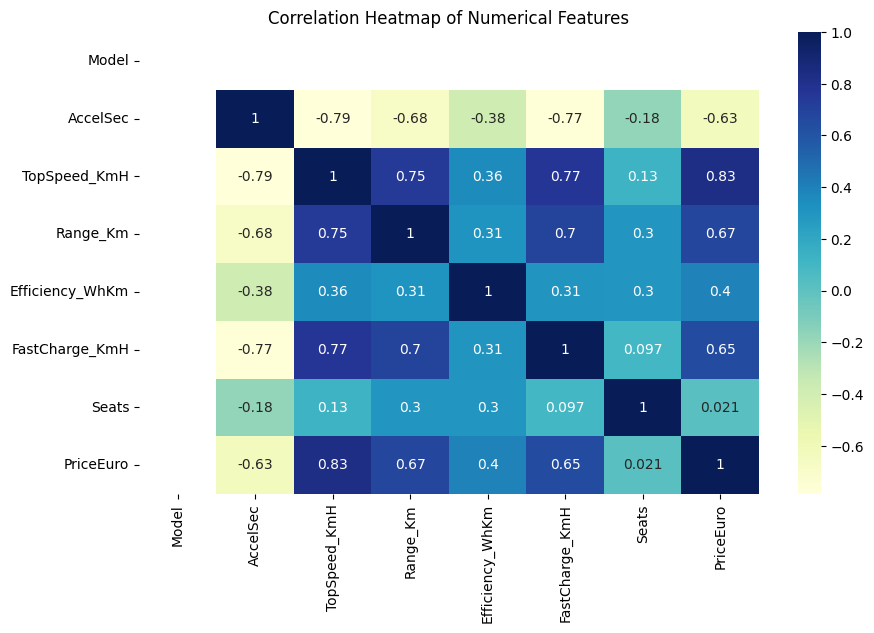

In [36]:
#Shows relationships between numeric attributes.
plt.figure(figsize=(10, 6))
numeric_df = df.apply(pd.to_numeric, errors='coerce')
numeric_df = numeric_df.dropna(axis=1, how='all')
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

1. High Positive Correlations:

- TopSpeed_KmH and PriceEuro (0.83): Faster cars are generally more expensive.

- Range_Km and PriceEuro (0.67): Longer range cars are priced higher.

2. High Negative Correlations:

- AccelSec and TopSpeed_KmH (-0.79): Cars with faster acceleration usually have higher top speeds.

- AccelSec and FastCharge_KmH (-0.77): Faster accelerating cars tend to charge more quickly.

<ipython-input-37-23c95aa8c8c7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Segment', y='TopSpeed_KmH', palette='muted')


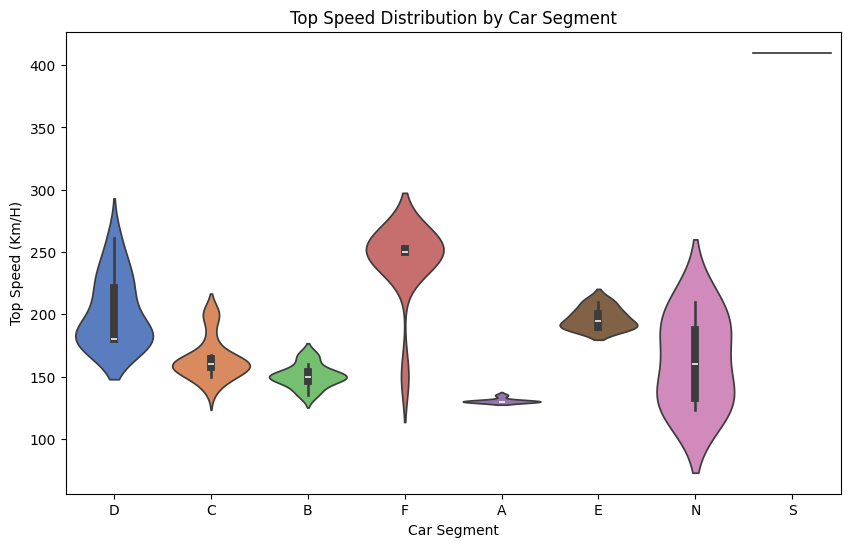

In [37]:
#To see the distribution and range of top speeds.
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Segment', y='TopSpeed_KmH', palette='muted')
plt.title('Top Speed Distribution by Car Segment')
plt.xlabel('Car Segment')
plt.ylabel('Top Speed (Km/H)')
plt.show()


F segment has the highest speeds (around 300 km/h).

A segment has the lowest speeds (around 100 km/h).

D and N segments have varied speed ranges.

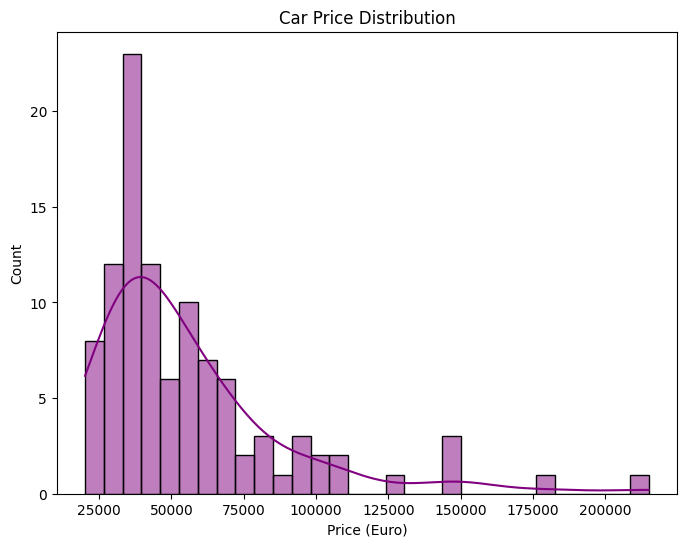

In [39]:
# spread of car prices.
plt.figure(figsize=(8, 6))
sns.histplot(df['PriceEuro'], kde=True, bins=30, color='purple')
plt.title('Car Price Distribution')
plt.xlabel('Price (Euro)')
plt.show()


Price Distribution: Most cars are priced between €25,000 and €50,000.

Right Skew: A few cars have much higher prices, going up to €200,000.



# **CONCLUSION**


1. The analysis reveals that the majority of cars belong to segments C and B, with sedans and hatchbacks being the most common body styles.
2. Cars are generally priced between €25,000 and €50,000, while luxury models are scarce.
3. Brands like Tesla and Porsche dominate in speed and acceleration, while SUVs and MPVs often have greater range but come at a higher cost.
4. Overall, the data indicates a strong presence of affordable and mid-range
cars, with performance-oriented and luxury models occupying a niche market.